In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df=pd.read_csv("haberman.csv")
df

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   30      305 non-null    int64
 1   64      305 non-null    int64
 2   1       305 non-null    int64
 3   1.1     305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [21]:
import pandas as pd
url=r"C:\Users\mahesh sai\Downloads\haberman.csv"
columns=["Age","Operation_Year","Axillary_Nodes","Survival_Status"]
df=pd.read_csv(url,names=columns)
df.head()

,Age,Operation_Year,Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [25]:
df.shape

(306, 4)

In [29]:
### Check Column Names & Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Operation_Year   306 non-null    int64
 2   Axillary_Nodes   306 non-null    int64
 3   Survival_Status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [31]:
### Check for Missing Values

df.isnull().sum()

Age                0
Operation_Year     0
Axillary_Nodes     0
Survival_Status    0
dtype: int64

In [33]:
#### Statistical Summary
df.describe()

,Age,Operation_Year,Axillary_Nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [37]:
### Check Class Distribution (Survival Status)
df['Survival_Status'].value_counts()
# 225  # Survived ≥5 years
# 81  # Died within 5 years

Survival_Status
1    225
2     81
Name: count, dtype: int64

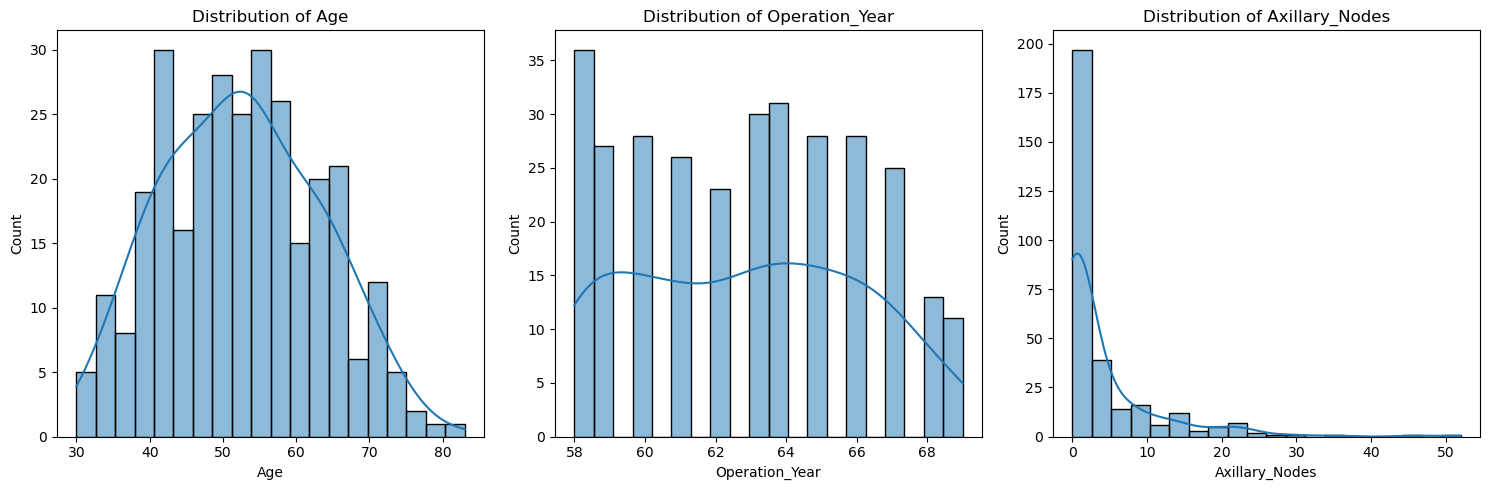

In [43]:
#Step 4: Univariate Analysis
#Histograms for Numerical Features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.figure(figsize=(15, 5))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [ ]:
Observations:

Age: Most patients are between 40-60 years old.

Operation_Year: Data collected from 1958-1969, with peaks around 1960-1965.

Axillary_Nodes: Highly right-skewed (most patients have 0-5 nodes).

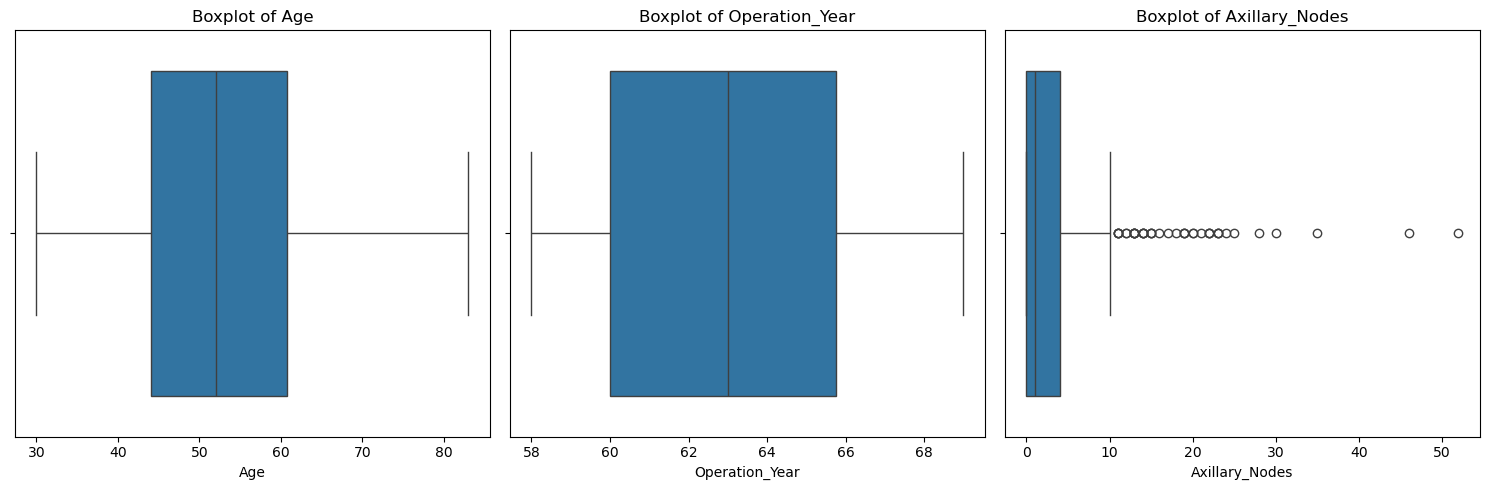

In [45]:
## Boxplots for Numerical Features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.figure(figsize=(15, 5))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [ ]:
Observations:
---> Axillary_Nodes has many outliers (some patients have >10 nodes).

In [ ]:
Step 5: Bivariate Analysis:

Scatter Plots (Age vs Axillary Nodes)

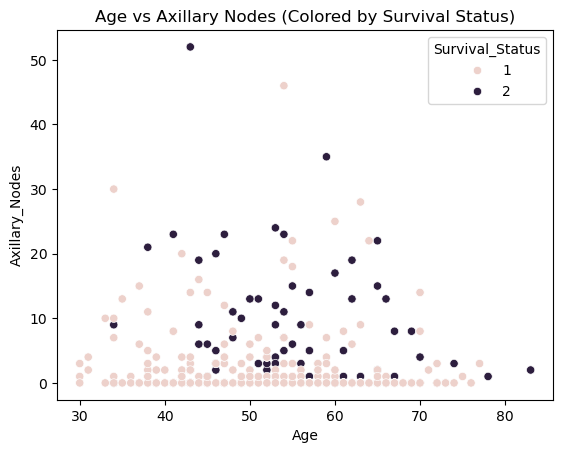

In [47]:
sns.scatterplot(data=df, x="Age", y="Axillary_Nodes", hue="Survival_Status")
plt.title("Age vs Axillary Nodes (Colored by Survival Status)")
plt.show()

In [ ]:
Observations:
---> Patients with 0-5 nodes have a higher survival rate.

--->Older patients (60+) with many nodes (>10) tend to have lower survival rates.

### Pair Plot

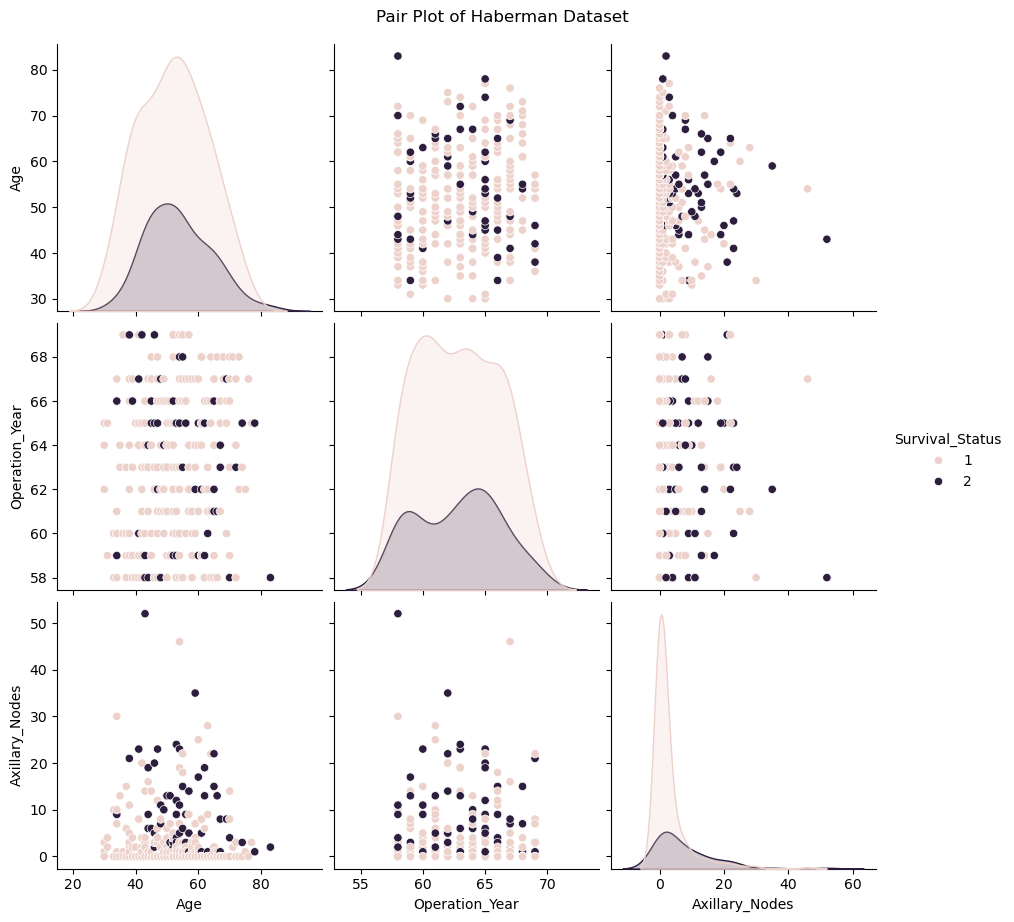

In [50]:
sns.pairplot(df, hue="Survival_Status", height=3)
plt.suptitle("Pair Plot of Haberman Dataset", y=1.02)
plt.show()

In [ ]:
Observations:
--->No clear linear separation between survival classes.

--->Higher axillary nodes → Lower survival rate.

### Step 6: Multivariate Analysis

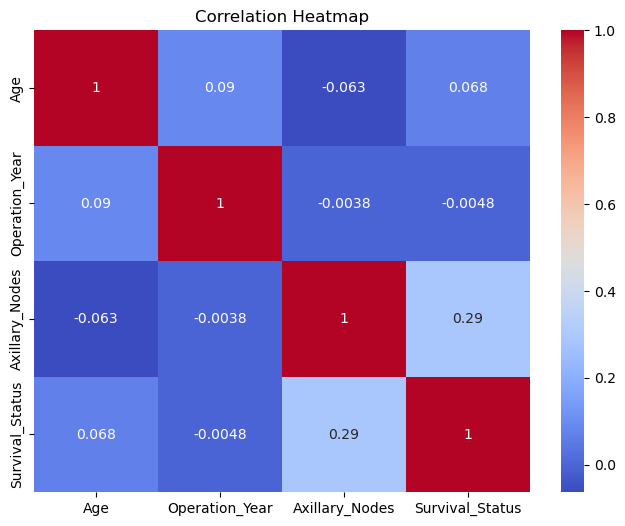

In [53]:
### Correlation Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
Observations:
--->Weak correlation between features.
--->Axillary_Nodes has a slight positive correlation with Survival_Status (but not strong).